<a href="https://colab.research.google.com/github/techie-mayank/Data-Analytics/blob/main/R-Practice/R_Practice_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary R packages
install.packages("tidyverse")  # For data manipulation and visualization
install.packages("dplyr")      # For data transformation
install.packages("ggplot2")    # For plotting
install.packages("readr")      # For reading data

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Load necessary libraries
library(tidyverse)

# Create sales data for each region and product category
sales_data <- data.frame(
  Month = rep(1:12, 9),  # 12 months for 9 categories (3 products * 3 regions)
  Region = rep(c("North", "South", "East"), each = 36),
  Product = rep(rep(c("Smartphones", "Laptops", "Accessories"), each = 12), 3),
  Sales = c(
    # North Region
    50, 65, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160,
    40, 48, 55, 60, 65, 75, 85, 90, 100, 110, 120, 130,
    30, 34, 38, 42, 50, 55, 60, 70, 75, 80, 85, 90,

    # South Region
    60, 70, 75, 85, 95, 105, 115, 125, 135, 145, 155, 165,
    45, 50, 58, 65, 70, 80, 90, 100, 110, 115, 125, 135,
    35, 38, 42, 45, 55, 60, 65, 75, 80, 85, 90, 95,

    # East Region
    55, 68, 72, 82, 92, 102, 112, 122, 132, 142, 152, 162,
    42, 49, 53, 62, 67, 78, 88, 95, 105, 112, 122, 132,
    32, 36, 40, 44, 52, 58, 63, 72, 78, 82, 87, 92
  )
)

# Display first few rows
head(sales_data)

,Month,Region,Product,Sales
,<int>,<chr>,<chr>,<dbl>
1,1,North,Smartphones,50
2,2,North,Smartphones,65
3,3,North,Smartphones,70
4,4,North,Smartphones,80
5,5,North,Smartphones,90
6,6,North,Smartphones,100


In [4]:
# Compute total revenue
total_revenue <- sum(sales_data$Sales)
print(paste("Total Revenue (in thousands of dollars):", total_revenue))

[1] "Total Revenue (in thousands of dollars): 9124"


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


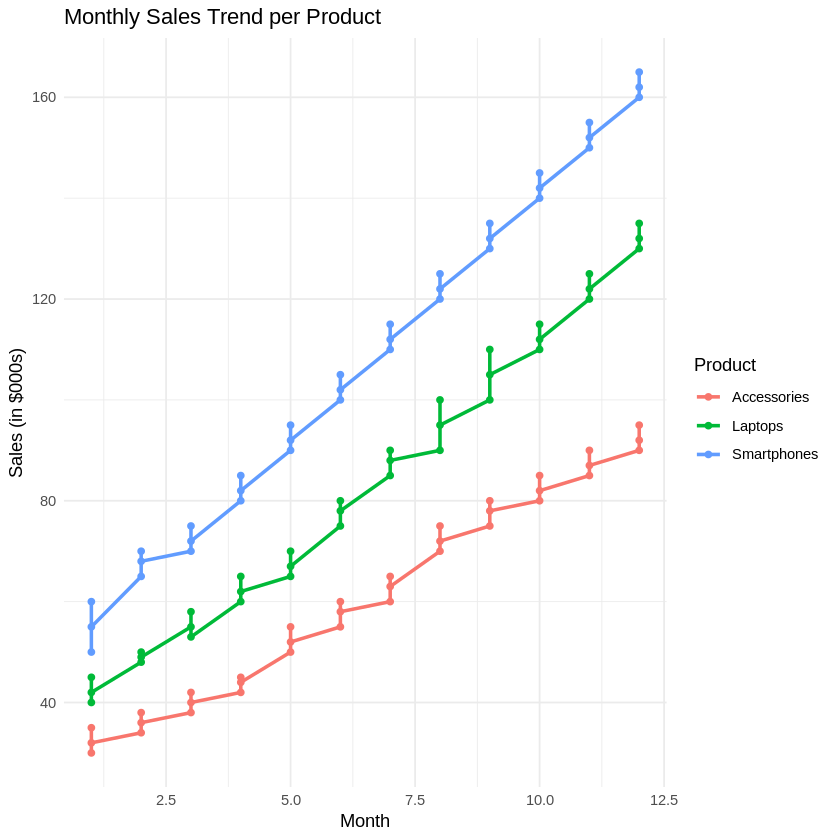

In [5]:
# Monthly Sales Trend per Product
library(ggplot2)

ggplot(sales_data, aes(x = Month, y = Sales, color = Product, group = Product)) +
  geom_line(size = 1) +
  geom_point() +
  labs(title = "Monthly Sales Trend per Product",
       x = "Month",
       y = "Sales (in $000s)") +
  theme_minimal()

In [6]:
# Compute growth rate per region
regional_growth <- sales_data %>%
  group_by(Region) %>%
  summarize(
    Start_Sales = sum(Sales[Month == 1]),
    End_Sales = sum(Sales[Month == 12]),
    Growth_Rate = ((End_Sales - Start_Sales) / Start_Sales) * 100
  )

print(regional_growth)

# A tibble: 3 × 4
  Region Start_Sales End_Sales Growth_Rate
  <chr>        <dbl>     <dbl>       <dbl>
1 East           129       386        199.
2 North          120       380        217.
3 South          140       395        182.


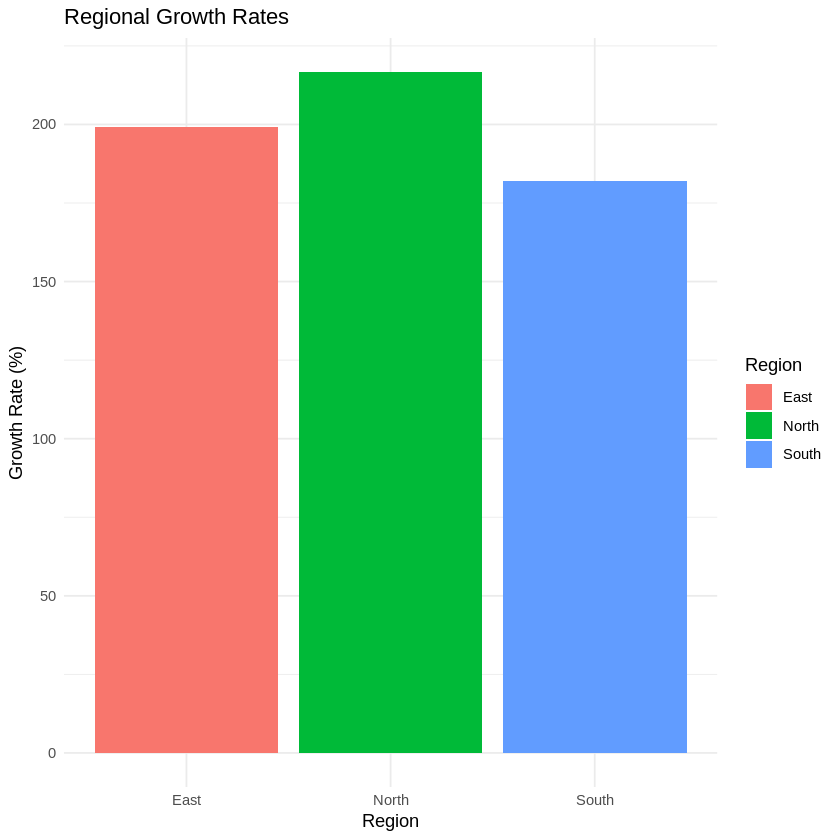

In [7]:
ggplot(regional_growth, aes(x = Region, y = Growth_Rate, fill = Region)) +
  geom_bar(stat = "identity") +
  labs(title = "Regional Growth Rates",
       x = "Region",
       y = "Growth Rate (%)") +
  theme_minimal()